<a href="https://colab.research.google.com/github/hardyjavier/cjmarquezr/blob/main/Mineria_de_Datos_BOSTON-HOUSES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_csv("/content/sample_data/kc_house_data.csv")
datos

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
datos.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [ ]:
columnas = ['id','price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

## Comportamiento por variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


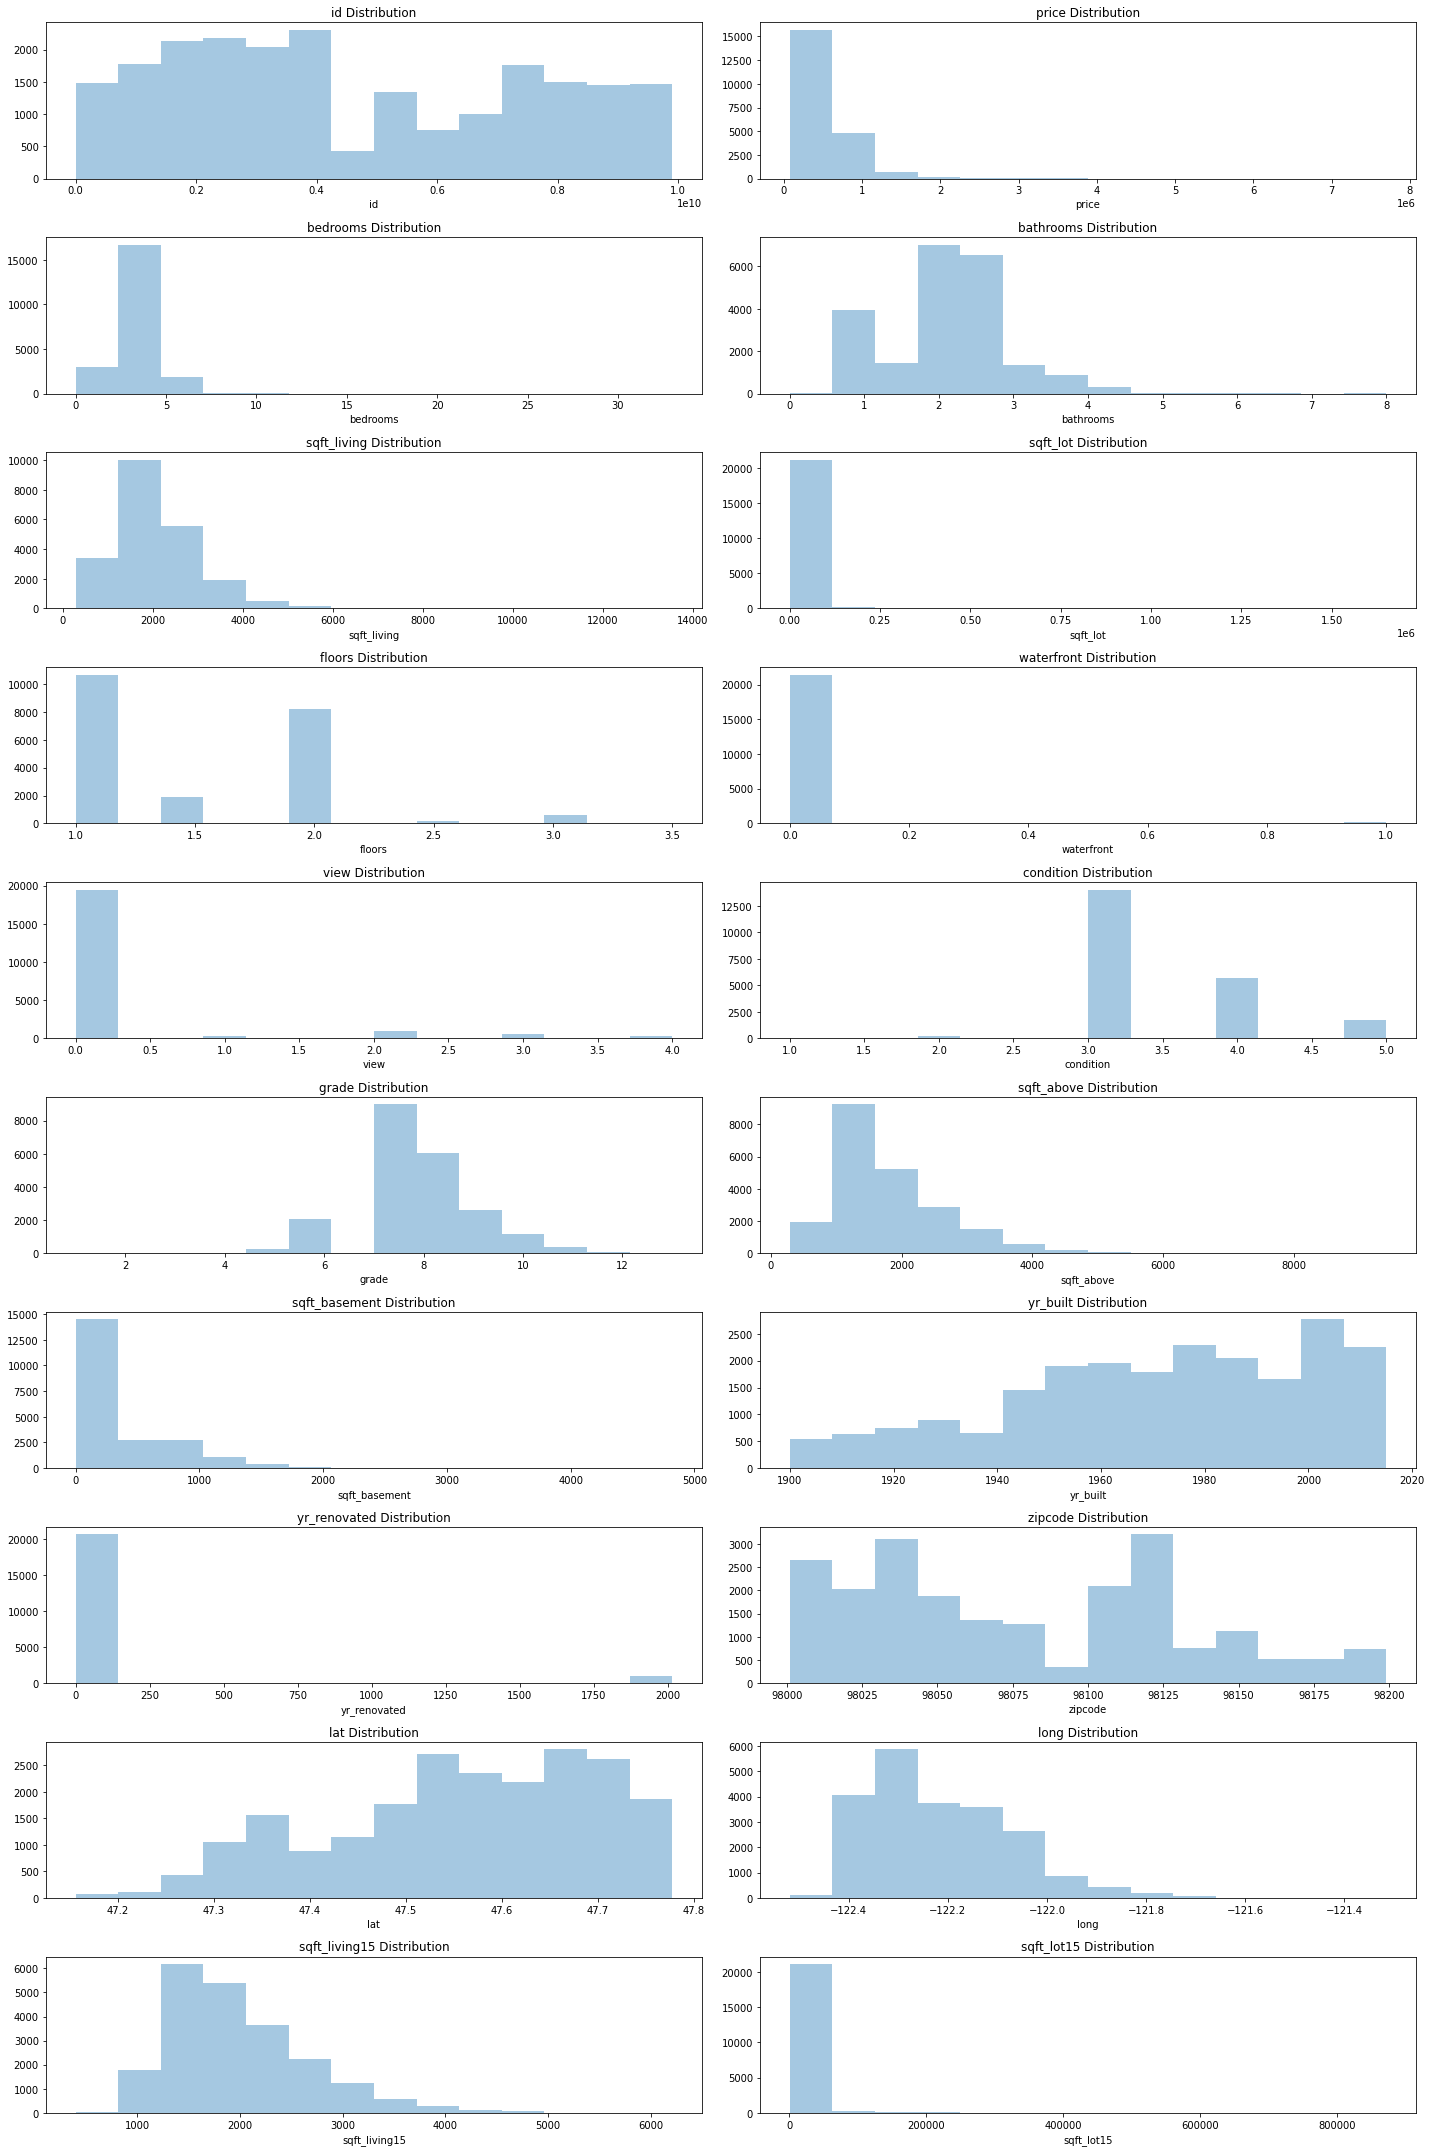

In [ ]:
fig=plt.figure(figsize=(20,30))
for i, feature in enumerate(columnas):
    ax=fig.add_subplot(10,2,i+1)
    sns.distplot(datos[feature], bins=14, kde=False)
    ax.set_title(feature+" Distribution")

fig.tight_layout()
plt.show()

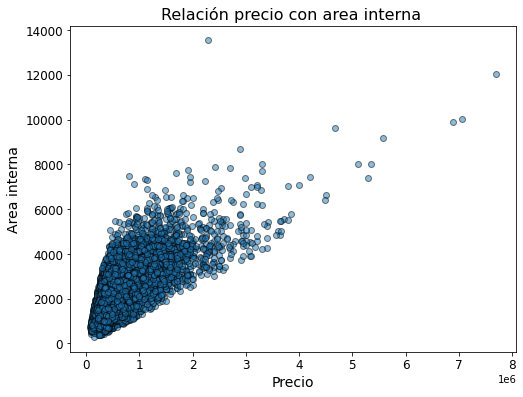

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(datos['price'], datos['sqft_living'],alpha=0.5, edgecolor='k')
plt.title('Relación precio con area interna ', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Area interna', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

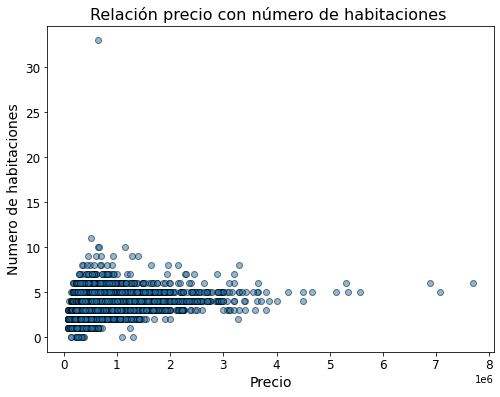

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(datos['price'], datos['bedrooms'],alpha=0.5, edgecolor='k')
plt.title('Relación precio con número de habitaciones ', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Numero de habitaciones', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

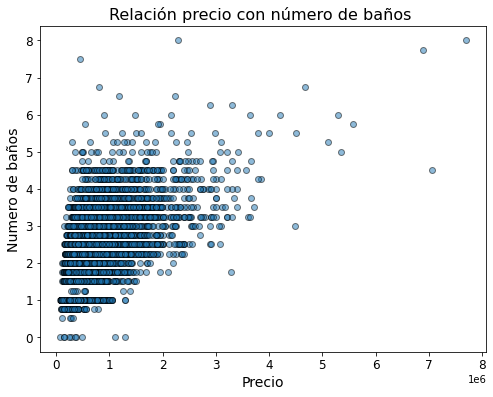

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(datos['price'], datos['bathrooms'],alpha=0.5, edgecolor='k')
plt.title('Relación precio con número de baños ', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Numero de baños', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

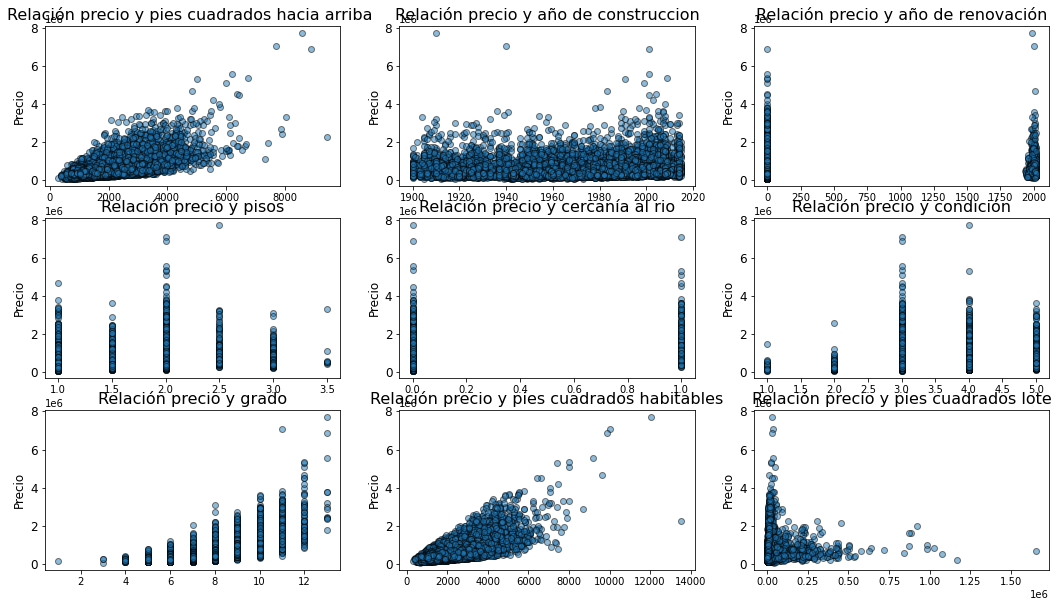

In [ ]:
#Relación precio con otras variables
plt.figure(figsize=(18,10))

plt.subplot(331)
plt.scatter(y=datos['price'], x=datos['sqft_above'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Relación precio y pies cuadrados hacia arriba ', fontsize=16)

plt.subplot(332)
plt.scatter(y=datos['price'], x=datos['yr_built'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Relación precio y año de construccion', fontsize=16)


plt.subplot(333)
plt.scatter(y=datos['price'], x=datos['yr_renovated'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Relación precio y año de renovación', fontsize=16)


plt.subplot(334)
plt.scatter(y=datos['price'], x=datos['floors'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y pisos', fontsize=16)


plt.subplot(335)
plt.scatter(y=datos['price'], x=datos['waterfront'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y cercanía al rio', fontsize=16)


plt.subplot(336)
plt.scatter(y=datos['price'], x=datos['condition'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y condición', fontsize=16)


plt.subplot(337)
plt.scatter(y=datos['price'], x=datos['grade'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y grado', fontsize=16)

plt.subplot(338)
plt.scatter(y=datos['price'], x=datos['sqft_living'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y pies cuadrados habitables', fontsize=16)

plt.subplot(339)
plt.scatter(y=datos['price'], x=datos['sqft_lot'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y pies cuadrados lote', fontsize=16)


plt.show()

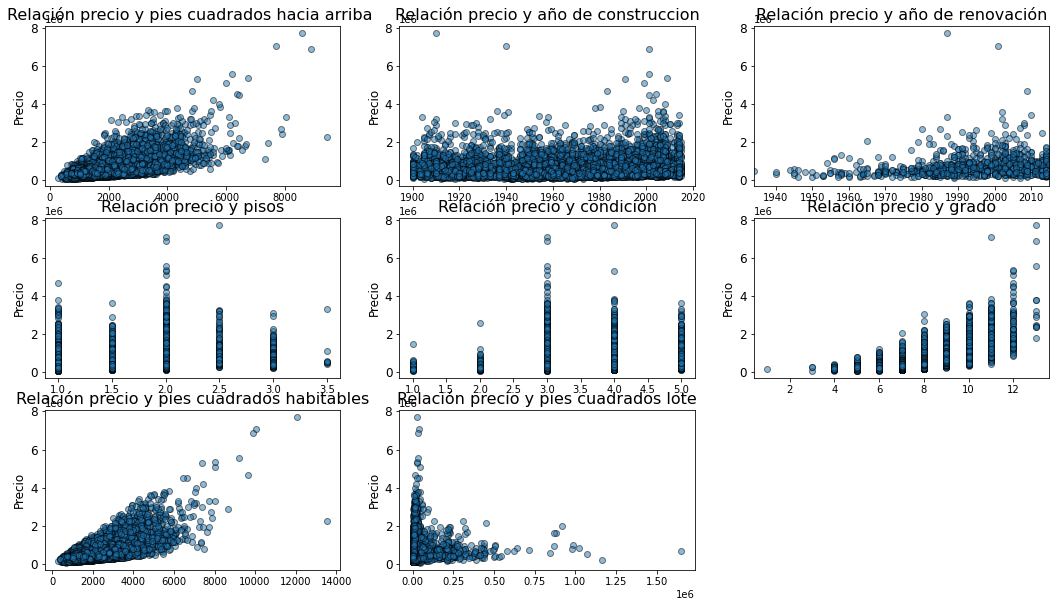

In [ ]:
#Relación precio con otras variables
plt.figure(figsize=(18,10))

plt.subplot(331)
plt.scatter(y=datos['price'], x=datos['sqft_above'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Relación precio y pies cuadrados hacia arriba ', fontsize=16)

plt.subplot(332)
plt.scatter(y=datos['price'], x=datos['yr_built'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Relación precio y año de construccion', fontsize=16)


plt.subplot(333)
plt.scatter(y=datos['price'], x=datos['yr_renovated'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.xlim(1934,2015)
plt.ylabel('Precio', fontsize=12)
plt.title('Relación precio y año de renovación', fontsize=16)


plt.subplot(334)
plt.scatter(y=datos['price'], x=datos['floors'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y pisos', fontsize=16)


plt.subplot(335)
plt.scatter(y=datos['price'], x=datos['condition'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y condición', fontsize=16)

plt.subplot(337)
plt.scatter(y=datos['price'], x=datos['sqft_living'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y pies cuadrados habitables', fontsize=16)

plt.subplot(338)
plt.scatter(y=datos['price'], x=datos['sqft_lot'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y pies cuadrados lote', fontsize=16)

plt.subplot(338)
plt.scatter(y=datos['price'], x=datos['sqft_lot'],alpha=0.5, edgecolor='k')
plt.ylabel('Precio', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relación precio y pies cuadrados lote', fontsize=16)
plt.show()

In [ ]:
#Correlación
km_data = datos.drop(['yr_built','yr_renovated','lat','long'],axis=1)
corr = km_data.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,-0.01,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,-0.05,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,-0.15,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,-0.20,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,-0.20,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,-0.13,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,-0.06,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,0.03,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,0.00,-0.09,-0.00


# Agrupamiento

In [ ]:
km = km_data[['price','bedrooms','bathrooms','floors','sqft_lot','sqft_living', 'grade','zipcode']]
km.head()


,price,bedrooms,bathrooms,floors,sqft_lot,sqft_living,grade,zipcode
0,221900.0,3,1.00,1.0,5650,1180,7,98178
1,538000.0,3,2.25,2.0,7242,2570,7,98125
2,180000.0,2,1.00,1.0,10000,770,6,98028
3,604000.0,4,3.00,1.0,5000,1960,7,98136
4,510000.0,3,2.00,1.0,8080,1680,8,98074


In [ ]:
scaler = StandardScaler()
km_scale = scaler.fit_transform(km)
km_scale[0:5]

array([[-0.86671733, -0.39873715, -1.44746357, -0.915427  , -0.22832133,
        -0.97983502, -0.55883575,  1.87015159],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.93650577, -0.18988538,
         0.53363434, -0.55883575,  0.87956753],
       [-0.98084935, -1.47395936, -1.44746357, -0.915427  , -0.12329847,
        -1.42625404, -1.40958711, -0.9333882 ],
       [ 0.17409044,  0.67648506,  1.14944885, -0.915427  , -0.2440144 ,
        -0.13055006, -0.55883575,  1.08516045],
       [-0.08195753, -0.39873715, -0.14900736, -0.915427  , -0.16965339,
        -0.43542158,  0.29191561, -0.073636  ]])

## K-means

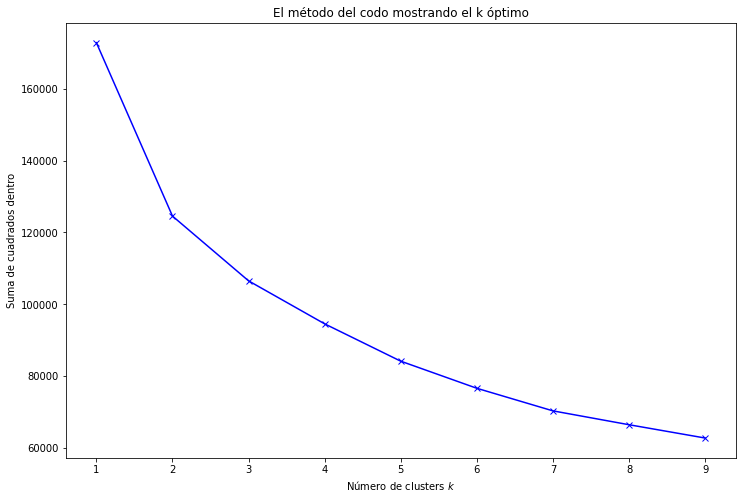

In [ ]:
#Elección k, método del codo
ssw = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init="random",n_init=10,max_iter=300,random_state=42)
    kmeanModel.fit(km_scale)
    ssw.append(kmeanModel.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, ssw, 'bx-')
plt.xlabel('Número de clusters $k$')
plt.ylabel('Suma de cuadrados dentro')
plt.title('El método del codo mostrando el k óptimo')
plt.show()

### *2 clusters*

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=2,
        random_state=42
    )

In [ ]:
kmeans.fit(km_scale)

KMeans(init='random', n_clusters=2, random_state=42)

In [ ]:
datos['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
centroides = pd.DataFrame(kmeans.cluster_centers_)
centroides.columns = ['price','bedrooms','bathrooms','floors','sqft_lot','sqft_living', 'grade','zipcode']
centroides

,price,bedrooms,bathrooms,floors,sqft_lot,sqft_living,grade,zipcode
0,-0.401286,-0.400364,-0.579715,-0.502576,-0.086989,-0.575472,-0.572247,0.188473
1,0.556738,0.555459,0.804289,0.697266,0.120687,0.798401,0.793928,-0.261484


In [ ]:
datos['cluster'] = kmeans.labels_

Text(0.5, 1.0, 'Precios según cluster')

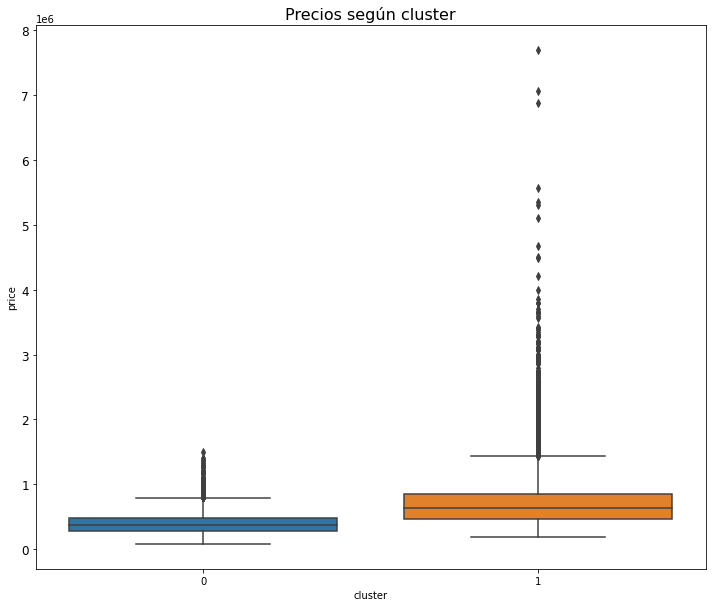

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(y=datos['price'],x=datos['cluster'])
plt.yticks(fontsize=12)
plt.title('Precios según cluster', fontsize=16)

In [ ]:
datos.groupby('cluster')['price','bedrooms','bathrooms','floors','sqft_lot','sqft_living', 'grade','zipcode'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms,floors,sqft_lot,sqft_living,grade,zipcode
cluster,,,,,,,,
0,392604.223498,2.997527,1.667125,1.221863,11510.185611,1550.646088,6.983010,98088.033581
1,743812.897532,3.886514,2.733087,1.870648,20075.329771,2810.976532,8.587704,98063.996915


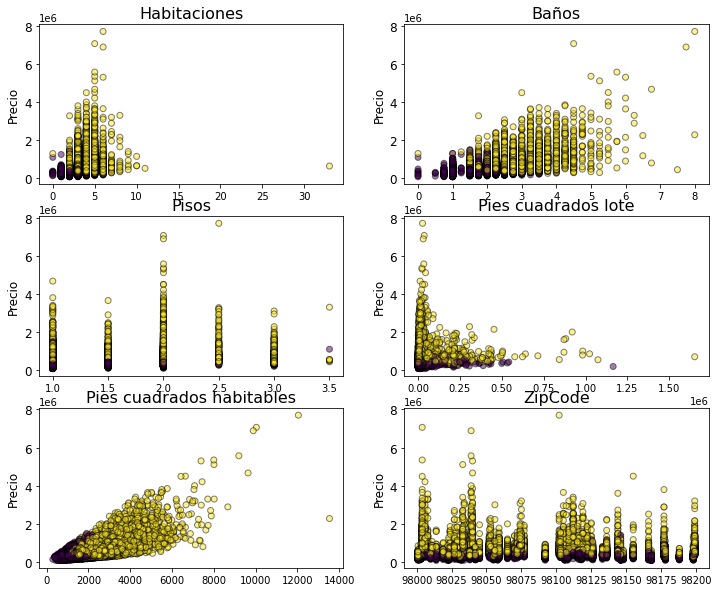

In [ ]:
# Relacion precio por cluster
plt.figure(figsize=(12,10))

plt.subplot(321)
plt.scatter(y=datos['price'], x=datos['bedrooms'],c=datos['cluster'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Habitaciones', fontsize=16)

plt.subplot(322)
plt.scatter(y=datos['price'], x=datos['bathrooms'],c=datos['cluster'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Baños', fontsize=16)


plt.subplot(323)
plt.scatter(y=datos['price'], x=datos['floors'],c=datos['cluster'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Pisos', fontsize=16)


plt.subplot(324)
plt.scatter(y=datos['price'], x=datos['sqft_lot'],c=datos['cluster'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Pies cuadrados lote', fontsize=16)

plt.subplot(325)
plt.scatter(y=datos['price'], x=datos['sqft_living'],c=datos['cluster'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Pies cuadrados habitables', fontsize=16)

plt.subplot(326)
plt.scatter(y=datos['price'], x=datos['zipcode'],c=datos['cluster'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('ZipCode', fontsize=16)

plt.show()

### *3 Clusters*

In [ ]:
kmeans_3k = KMeans(
        init="random",
        n_clusters=3,
        random_state=42
    )

In [ ]:
kmeans_3k.fit(km_scale)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
datos['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
centroides = pd.DataFrame(kmeans_3k.cluster_centers_)
centroides.columns = ['price','bedrooms','bathrooms','floors','sqft_lot','sqft_living', 'grade','zipcode']
centroides

,price,bedrooms,bathrooms,floors,sqft_lot,sqft_living,grade,zipcode
0,-0.443690,-0.532860,-0.811631,-0.714331,-0.077054,-0.688007,-0.681271,0.275677
1,-0.028238,0.301300,0.445788,0.531578,-0.062341,0.202470,0.217902,-0.204682
2,1.802500,0.895726,1.414078,0.717460,0.530472,1.862778,1.778613,-0.278648


In [ ]:
datos['cluster_3k'] = kmeans_3k.labels_

Text(0.5, 1.0, 'Precios según cluster')

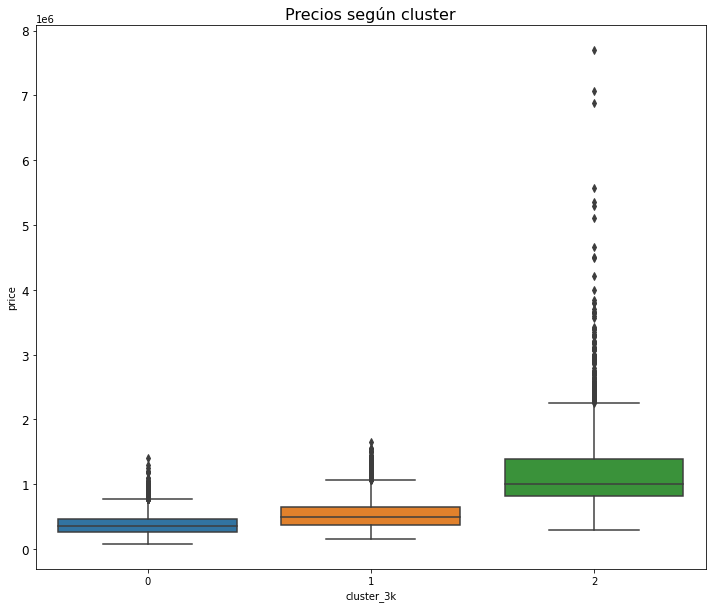

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(y=datos['price'],x=datos['cluster_3k'])
plt.yticks(fontsize=12)
plt.title('Precios según cluster', fontsize=16)

In [ ]:
datos.groupby('cluster_3k')['price','bedrooms','bathrooms','floors','sqft_lot','sqft_living', 'grade'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms,floors,sqft_lot,sqft_living,grade
cluster_3k,,,,,,,
0,3.770343e+05,2.874387,1.488645,1.108071,11900.184087,1446.944659,6.855174
1,5.294339e+05,3.649963,2.457060,1.780492,12528.866057,2264.845782,7.911020
2,1.200789e+06,4.204211,3.202523,1.881605,37058.621772,3788.802940,9.746126


In [ ]:
datos.groupby('cluster_3k')['price','bedrooms','bathrooms','floors','sqft_lot','sqft_living', 'grade'].quantile([.25, .75])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


price  bedrooms  bathrooms  floors  sqft_lot  \
cluster_3k                                                          
0          0.25   258750.0       2.0       1.00     1.0    5258.0   
           0.75   462000.0       3.0       1.75     1.0    9774.0   
1          0.25   373250.0       3.0       2.25     1.5    4500.0   
           0.75   649970.0       4.0       2.50     2.0   10200.0   
2          0.25   820875.0       4.0       2.50     2.0    7452.0   
           0.75  1395000.0       5.0       3.50     2.0   23885.0   

                 sqft_living  grade  
cluster_3k                           
0          0.25       1130.0    7.0  
           0.75       1730.0    7.0  
1          0.25       1870.0    7.0  
           0.75       2630.0    8.0  
2          0.25       3200.0    9.0  
           0.75       4150.0   10.0

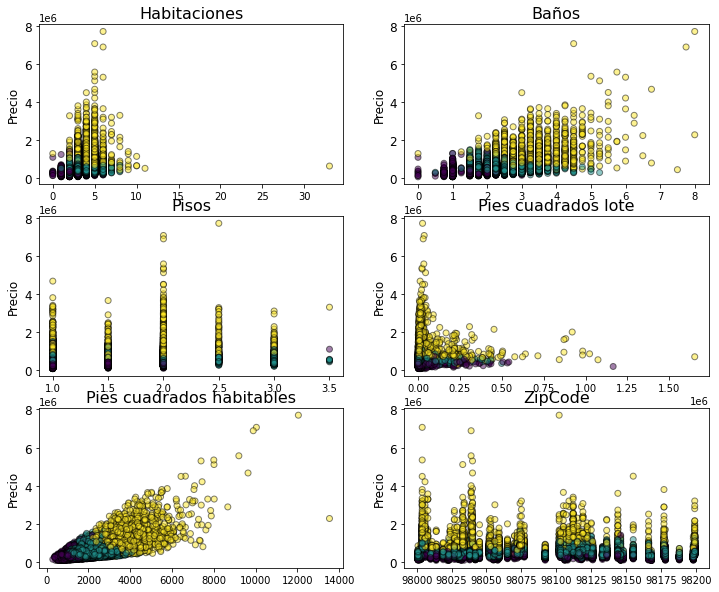

In [ ]:
# Relacion precio por cluster
plt.figure(figsize=(12,10))

plt.subplot(321)
plt.scatter(y=datos['price'], x=datos['bedrooms'],c=datos['cluster_3k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Habitaciones', fontsize=16)

plt.subplot(322)
plt.scatter(y=datos['price'], x=datos['bathrooms'],c=datos['cluster_3k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Baños', fontsize=16)


plt.subplot(323)
plt.scatter(y=datos['price'], x=datos['floors'],c=datos['cluster_3k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Pisos', fontsize=16)


plt.subplot(324)
plt.scatter(y=datos['price'], x=datos['sqft_lot'],c=datos['cluster_3k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Pies cuadrados lote', fontsize=16)

plt.subplot(325)
plt.scatter(y=datos['price'], x=datos['sqft_living'],c=datos['cluster_3k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Pies cuadrados habitables', fontsize=16)

plt.subplot(326)
plt.scatter(y=datos['price'], x=datos['zipcode'],c=datos['cluster_3k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('ZipCode', fontsize=16)

plt.show()

### *4 Clusters*

In [ ]:
kmeans_4k = KMeans(
        init="random",
        n_clusters=4,
        random_state=42
    )

In [ ]:
kmeans_4k.fit(km_scale)

KMeans(init='random', n_clusters=4, random_state=42)

In [ ]:
datos['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
centroides = pd.DataFrame(kmeans_4k.cluster_centers_)
centroides.columns = ['price','bedrooms','bathrooms','floors','sqft_lot','sqft_living', 'grade','zipcode']
centroides

,price,bedrooms,bathrooms,floors,sqft_lot,sqft_living,grade,zipcode
0,-0.046018,0.287942,0.432471,0.524635,-0.112909,0.178676,0.197357,-0.200555
1,0.301464,0.011679,0.442876,0.147828,6.411571,0.758640,0.509300,-0.658046
2,-0.445676,-0.536967,-0.819688,-0.722304,-0.125510,-0.693682,-0.684388,0.287256
3,1.786007,0.930027,1.392653,0.728382,0.080561,1.821049,1.748861,-0.244583


In [ ]:
datos['cluster_4k'] = kmeans_4k.labels_

Text(0.5, 1.0, 'Precios según cluster')

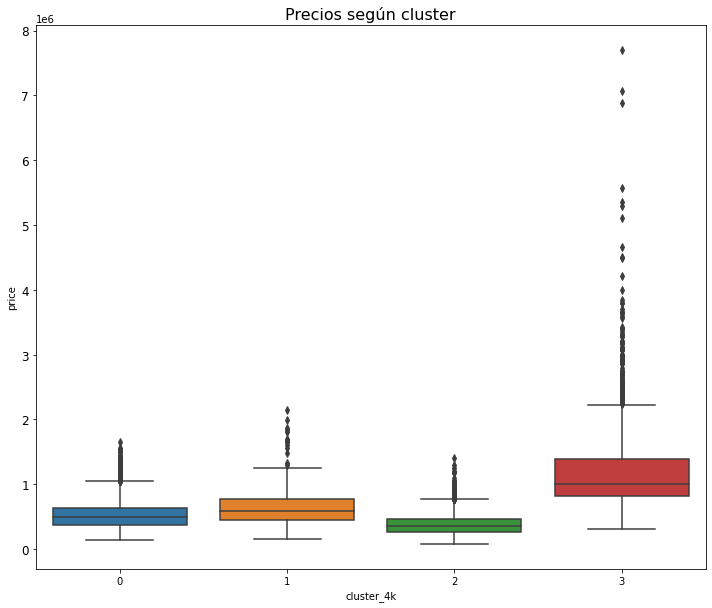

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(y=datos['price'],x=datos['cluster_4k'])
plt.yticks(fontsize=12)
plt.title('Precios según cluster', fontsize=16)

In [ ]:
datos.groupby('cluster_4k')['price','bedrooms','bathrooms','floors','sqft_lot','sqft_living', 'grade','zipcode'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms,floors,sqft_lot,sqft_living,grade,zipcode
cluster_4k,,,,,,,,
0,5.233069e+05,3.638407,2.448646,1.778152,10436.867159,2244.548812,7.890066,98067.199850
1,6.507614e+05,3.381703,2.455836,1.574132,280671.362776,2776.649842,8.255521,98042.731861
2,3.765551e+05,2.872625,1.483813,1.104448,9905.678272,1443.301879,6.852457,98093.289566
3,1.196358e+06,4.235689,3.187327,1.887485,18441.160679,3753.159495,9.713778,98064.865772


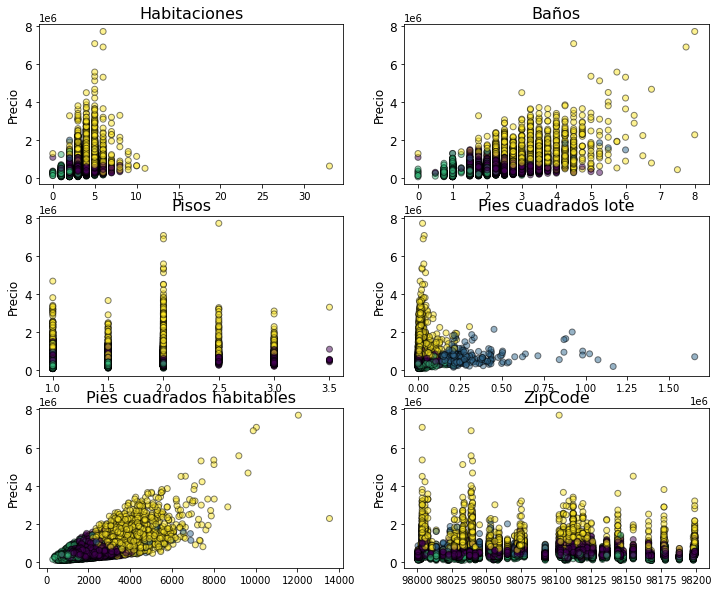

In [ ]:
# Relacion precio por cluster
plt.figure(figsize=(12,10))

plt.subplot(321)
plt.scatter(y=datos['price'], x=datos['bedrooms'],c=datos['cluster_4k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Habitaciones', fontsize=16)

plt.subplot(322)
plt.scatter(y=datos['price'], x=datos['bathrooms'],c=datos['cluster_4k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Baños', fontsize=16)


plt.subplot(323)
plt.scatter(y=datos['price'], x=datos['floors'],c=datos['cluster_4k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Pisos', fontsize=16)


plt.subplot(324)
plt.scatter(y=datos['price'], x=datos['sqft_lot'],c=datos['cluster_4k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Pies cuadrados lote', fontsize=16)

plt.subplot(325)
plt.scatter(y=datos['price'], x=datos['sqft_living'],c=datos['cluster_4k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('Pies cuadrados habitables', fontsize=16)

plt.subplot(326)
plt.scatter(y=datos['price'], x=datos['zipcode'],c=datos['cluster_4k'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.title('ZipCode', fontsize=16)

plt.show()

### Validación

In [ ]:
datos['cluster'] = kmeans.labels_
datos['cluster_3k'] = kmeans_3k.labels_
datos['cluster_3k'] = kmeans_3k.labels_

In [ ]:
print(kmeans.inertia_)

124575.7948448844


0    12537
1     9076
Name: cluster, dtype: int64


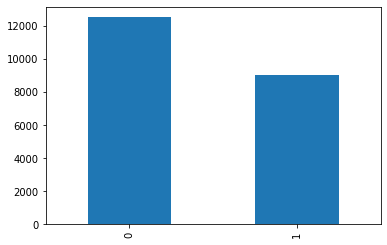

In [ ]:
print(datos.cluster.value_counts())
datos.cluster.value_counts().plot(kind='bar')

In [ ]:
print(kmeans_3k.inertia_)

106523.16284639642


0    9577
1    9519
2    2517
Name: cluster_3k, dtype: int64


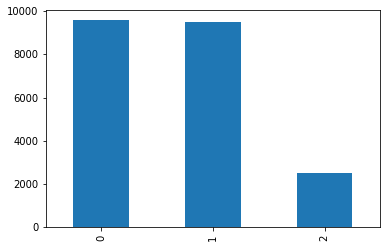

In [ ]:
print(datos.cluster_3k.value_counts())
datos.cluster_3k.value_counts().plot(kind='bar')